In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20433.0,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
rooms_per_household,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091


In [4]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

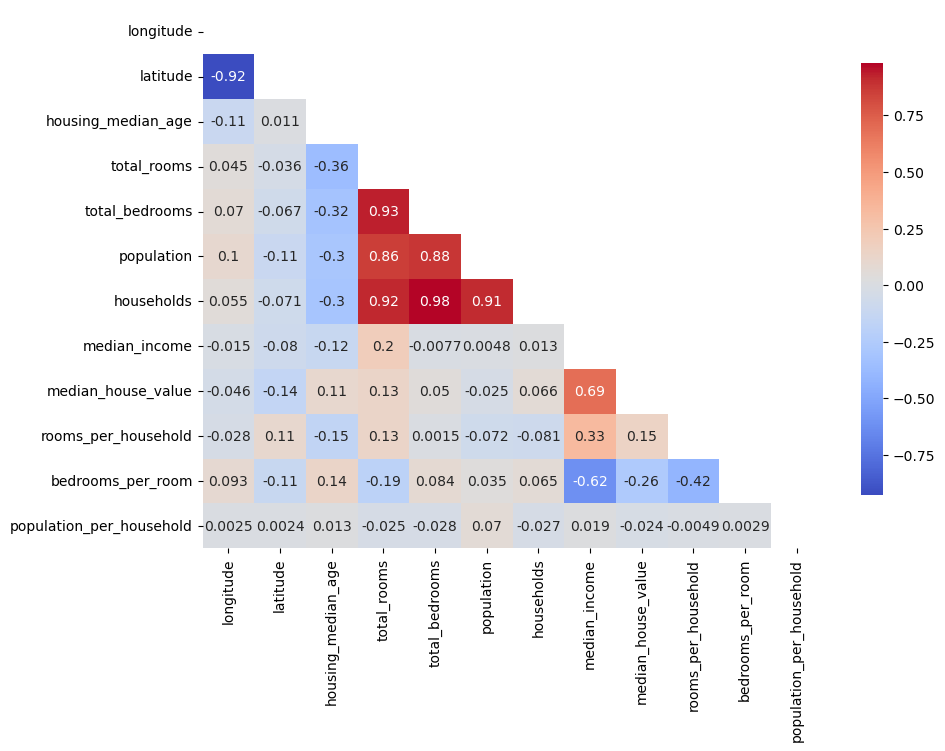

In [5]:
corrMatrix = df.corr(method='pearson', min_periods=1)
plt.figure(figsize=(10,7))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
ax = sns.heatmap(corrMatrix, annot=True, mask=mask, cbar_kws={"shrink": .8}, cmap='coolwarm')
plt.show()

In [6]:
df['above_average'] = (df['median_house_value'] > df['median_house_value'].mean()).astype(int)
df['above_average']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int64

In [7]:
df = df.fillna(0)

df_len = len(df)
df_idx = np.arange(df_len)
np.random.shuffle(df_idx)

train_len = int(df_len * 0.6)
val_len = int(df_len * 0.2)
test_len = df_len - (train_len + val_len)

print(f"Len of train: {train_len}")
print(f"Len of validate: {val_len}")
print(f"Len of test: {test_len}")

df_train = df.iloc[df_idx[:train_len]]
df_val = df.iloc[df_idx[train_len:train_len + val_len]]
df_test = df.iloc[df_idx[train_len + val_len:]]

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(columns=['median_house_value', 'above_average'])
df_val = df_val.drop(columns=['median_house_value', 'above_average'])
df_test = df_test.drop(columns=['median_house_value', 'above_average'])

Len of train: 12384
Len of validate: 4128
Len of test: 4128


In [8]:
mutual_info_score(df_train.ocean_proximity, y_train).round(2)

0.1

In [9]:
df_train = pd.get_dummies(df_train)
df_val = pd.get_dummies(df_val)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 20046 to 15993
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   12384 non-null  float64
 1   latitude                    12384 non-null  float64
 2   housing_median_age          12384 non-null  float64
 3   total_rooms                 12384 non-null  float64
 4   total_bedrooms              12384 non-null  float64
 5   population                  12384 non-null  float64
 6   households                  12384 non-null  float64
 7   median_income               12384 non-null  float64
 8   rooms_per_household         12384 non-null  float64
 9   bedrooms_per_room           12384 non-null  float64
 10  population_per_household    12384 non-null  float64
 11  ocean_proximity_<1H OCEAN   12384 non-null  uint8  
 12  ocean_proximity_INLAND      12384 non-null  uint8  
 13  ocean_proximity_ISLAND     

In [11]:
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
lr.fit(df_train, y_train)

y_predicted = lr.predict_proba(df_val)[:, 1]
y_predicted = (y_predicted >= 0.5)

etalon_accuracy = (y_val == y_predicted).mean()
etalon_accuracy.round(2)

0.83

In [12]:
for clm in df_train.columns:
    X_train = df_train.drop(columns=[clm])
    X_val = df_val.drop(columns=[clm])

    lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)

    y_predicted = lr.predict_proba(X_val)[:, 1]
    y_predicted = (y_predicted >= 0.5)

    accuracy = (y_val == y_predicted).mean()
    difference = accuracy - etalon_accuracy
    print(f"{clm}: {difference.round(6)}")

longitude: 0.003634
latitude: -0.00218
housing_median_age: -0.002665
total_rooms: -0.00218
total_bedrooms: -0.000242
population: -0.001938
households: 0.000484
median_income: -0.04094
rooms_per_household: -0.00218
bedrooms_per_room: -0.002422
population_per_household: -0.003149
ocean_proximity_<1H OCEAN: -0.002907
ocean_proximity_INLAND: -0.001696
ocean_proximity_ISLAND: -0.001453
ocean_proximity_NEAR BAY: -0.000969
ocean_proximity_NEAR OCEAN: -0.000969


In [13]:
df_len = len(df)
df_idx = np.arange(df_len)
np.random.shuffle(df_idx)

train_len = int(df_len * 0.6)
val_len = int(df_len * 0.2)
test_len = df_len - (train_len + val_len)

print(f"Len of train: {train_len}")
print(f"Len of validate: {val_len}")
print(f"Len of test: {test_len}")

df_train = df.iloc[df_idx[:train_len]]
df_val = df.iloc[df_idx[train_len:train_len + val_len]]
df_test = df.iloc[df_idx[train_len + val_len:]]

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

df_train = df_train.drop(columns=['median_house_value', 'above_average'])
df_val = df_val.drop(columns=['median_house_value', 'above_average'])
df_test = df_test.drop(columns=['median_house_value', 'above_average'])

df_train = pd.get_dummies(df_train)
df_val = pd.get_dummies(df_val)
df_test = pd.get_dummies(df_test)

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_predicted = model.predict(X_val)

    rmse = mean_squared_error(y_pred=y_predicted, y_true=y_val)
    print(f"{a}: {rmse.round(3)}")

Len of train: 12384
Len of validate: 4128
Len of test: 4128
0: 0.325
0.01: 0.325
0.1: 0.325
1: 0.325
10: 0.325
